# DQI Preliminary Analysis and Quantitative Feature Engineering

The following notebook examines the distribution of DQI scores in a labelled dataset and explores the relevance of quantitative features. The DQI is made up of six indicators: participation, level of justification, content of justification, counterarguments and constructive politics. The features explored are sentiment (negative, neutral and positive), character count, and category of the comment (facebook comment or live town hall transcription).

In [1]:
# Import python packages
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import graphlab
from graphlab import SFrame

In [13]:
# Import data and create dataframe
def create_df(data_file = 'combined_scored.csv'):
    data_df = pd.read_csv(data_file)
    print data_df.head()
    pd.to_numeric(data_df['level_of_justification'])
    pd.to_numeric(data_df['content_of_justification'])
    return data_df

data_df = create_df()

                                             comment  participation  \
0                           How about lowering taxes              1   
1                              Why the interruption?              1   
2  Make it mandatory that all apartments accept p...              1   
3                                            Resign!              1   
4                           Loser PM, please go away              1   

   level_of_justification  content_of_justification  respect  \
0                     0.0                       0.0      0.5   
1                     0.0                       0.0      0.5   
2                     0.0                       0.0      0.5   
3                     0.0                       0.0      0.0   
4                     0.0                       0.0      0.0   

   counterarguments  constructive_politics  sentiment  fb_comment  live_th  
0               0.0                    0.0        0.5           1        0  
1               0.0               

# Participation
There are two possible participation scores - 0 (no participation) and 1 (participation). Comments are given a 0 when they consist in an interruption of an other speaker. As we will see below, interruptions are rare, and the majority of comments will receive a participation score of 1.

Mean 0.929824561404
Minimum 0
Maximum 1
Standard Deviation 0.256004482533
Skew -3.38766192134
Kurtosis 9.5600392386

Probability of a comment being scored each category
1    0.929825
0    0.070175
Name: participation, dtype: float64


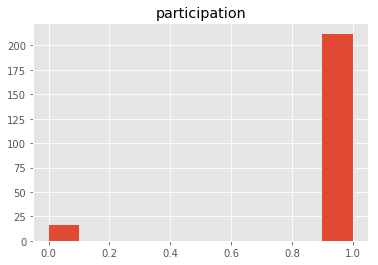

In [14]:
# Evaluate distribution of participation scores
data_df.hist('participation')
print 'Mean', data_df['participation'].mean()
print 'Minimum', data_df['participation'].min()
print 'Maximum', data_df['participation'].max()
print 'Standard Deviation', data_df['participation'].std()
print 'Skew', data_df['participation'].skew()
print 'Kurtosis', data_df['participation'].kurt()
print '\nProbability of a comment being scored each category'
print data_df['participation'].value_counts(1)

# Level of Justification
There are four possible level justification scores: no justification (0), inferior justification (0.33), qualified justification (0.67) and sophisticated justification (1). Justifications will be examples used to add weight to an argument. The more justifications are included, the higher the score. 

Mean 0.230219298246
Minimum 0.0
Maximum 1.0
Standard Deviation 0.308558457574
Skew 1.29847802527
Kurtosis 0.764913796887

Probability of each category
0.00    0.543860
0.33    0.302632
1.00    0.083333
0.67    0.070175
Name: level_of_justification, dtype: float64


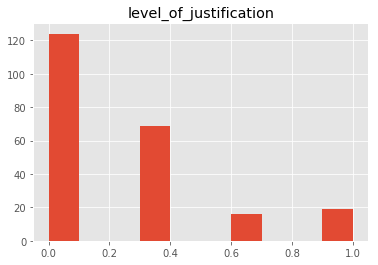

In [4]:
# Evaluate the distribution of Level of Justification Scores.
data_df.hist('level_of_justification')
print 'Mean', data_df['level_of_justification'].mean()
print 'Minimum', data_df['level_of_justification'].min()
print 'Maximum', data_df['level_of_justification'].max()
print 'Standard Deviation', data_df['level_of_justification'].std()
print 'Skew', data_df['level_of_justification'].skew()
print 'Kurtosis', data_df['level_of_justification'].kurt()
print '\nProbability of each category'
print data_df['level_of_justification'].value_counts(1)

# Content of Justification
This indicator examines the quality of the justification. The possible scores are: explicit statement concerning group interests (0), neutral statement (0.33), explicit statement of the common good in utilitarian terms (0.67), explicit statement of the common good in terms of the difference principle (1). 

Mean 0.365745614035
Minimum 0.0
Maximum 1.0
Standard Deviation 0.259400980961
Skew 1.03127844334
Kurtosis 1.17104224296

Probability of each category
0.33    0.662281
0.00    0.162281
1.00    0.092105
0.67    0.078947
0.50    0.004386
Name: content_of_justification, dtype: float64


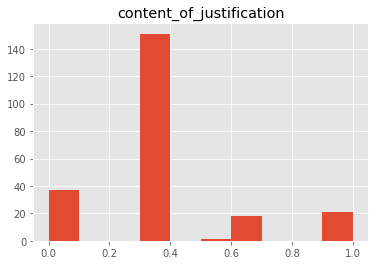

In [5]:
# Evaluate the distribution of Content of Justification Scores.
data_df.hist('content_of_justification')
print 'Mean', data_df['content_of_justification'].mean()
print 'Minimum', data_df['content_of_justification'].min()
print 'Maximum', data_df['content_of_justification'].max()
print 'Standard Deviation', data_df['content_of_justification'].std()
print 'Skew', data_df['content_of_justification'].skew()
print 'Kurtosis', data_df['content_of_justification'].kurt()
print '\nProbability of each category'
print data_df['content_of_justification'].value_counts(1)

# Respect
There are 3 posssible scores for respect - no respect (0), implicit respect (0.5) and explicit respect (1). Typically, no respect will include a expletive or disparaging words directed at another speaker. Explicit respect, on the other hand, will include praise or words of thanks to another speaker. Comments not containing either category will be categorized as implicit respect.

Mean 0.461140350877
Minimum 0.0
Maximum 1.0
Standard Deviation 0.376260896391
Skew 0.153979123859
Kurtosis -1.22007728631

Probability of each category
0.50    0.399123
0.00    0.315789
1.00    0.250000
0.33    0.035088
Name: respect, dtype: float64


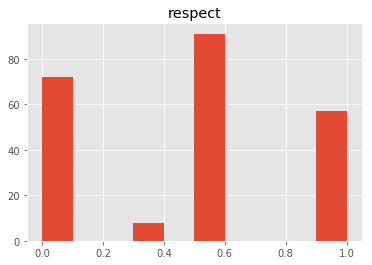

In [6]:
# Evaluate the distribution of respect scores.
data_df.hist('respect')
print 'Mean', data_df['respect'].mean()
print 'Minimum', data_df['respect'].min()
print 'Maximum', data_df['respect'].max()
print 'Standard Deviation', data_df['respect'].std()
print 'Skew', data_df['respect'].skew()
print 'Kurtosis', data_df['respect'].kurt()
print '\nProbability of each category'
print data_df['respect'].value_counts(1)

# Counterarguments
There are four possible scores for the counterarguments indicator. Counterarguments ignored (0) - when the speaker or commentor does not include any other arguments in the comment, counterarguments included but degraded (0.33), counterarguments included - neutral (0.67), and counterargument included and valued (1).

Mean 0.140131578947
Minimum 0.0
Maximum 1.0
Standard Deviation 0.294415691414
Skew 2.07585113198
Kurtosis 3.06169026983

Probability of each category
0.00    0.771930
0.33    0.105263
1.00    0.074561
0.67    0.039474
0.50    0.008772
Name: counterarguments, dtype: float64


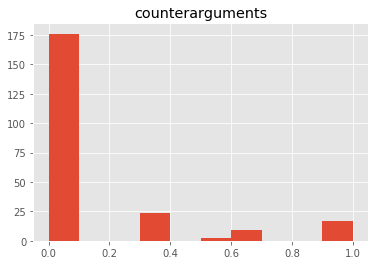

In [7]:
# Evaluate the distribution of counterarguments scores.
data_df.hist('counterarguments')
print 'Mean', data_df['counterarguments'].mean()
print 'Minimum', data_df['counterarguments'].min()
print 'Maximum', data_df['counterarguments'].max()
print 'Standard Deviation', data_df['counterarguments'].std()
print 'Skew', data_df['counterarguments'].skew()
print 'Kurtosis', data_df['counterarguments'].kurt()
print '\nProbability of each category'
print data_df['counterarguments'].value_counts(1)

# Constructive Politics
Three scores are possible in constructive politics. Positional politics (0) - when a speaker or commentor sticks to their position with no attempt at compromise, alternative proposal (0.5) - when the speaker makes a comment that provides another perspective without including other comments in the proposal, and mediating proposal (1), where the speaker includes several perspectives in an attempt to form a reconciliating position.

Mean 0.113289473684
Minimum 0.0
Maximum 1.0
Standard Deviation 0.277120442451
Skew 2.38163767074
Kurtosis 4.45806436483

Probability of each category
0.00    0.837719
0.50    0.092105
1.00    0.065789
0.33    0.004386
Name: constructive_politics, dtype: float64


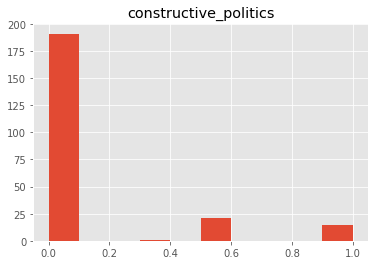

In [8]:
# Evaluate the distribution of constructive politics scores.
data_df.hist('constructive_politics')
print 'Mean', data_df['constructive_politics'].mean()
print 'Minimum', data_df['constructive_politics'].min()
print 'Maximum', data_df['constructive_politics'].max()
print 'Standard Deviation', data_df['constructive_politics'].std()
print 'Skew', data_df['constructive_politics'].skew()
print 'Kurtosis', data_df['constructive_politics'].kurt()
print '\nProbability of each category'
print data_df['constructive_politics'].value_counts(1)

# Sentiment Analysis
The following exploration attempts to find a correlation between the sentiment of the comment (negative (0), neutral (0.5) or positive (1)) and the score for each indicator. The results are graphed below.

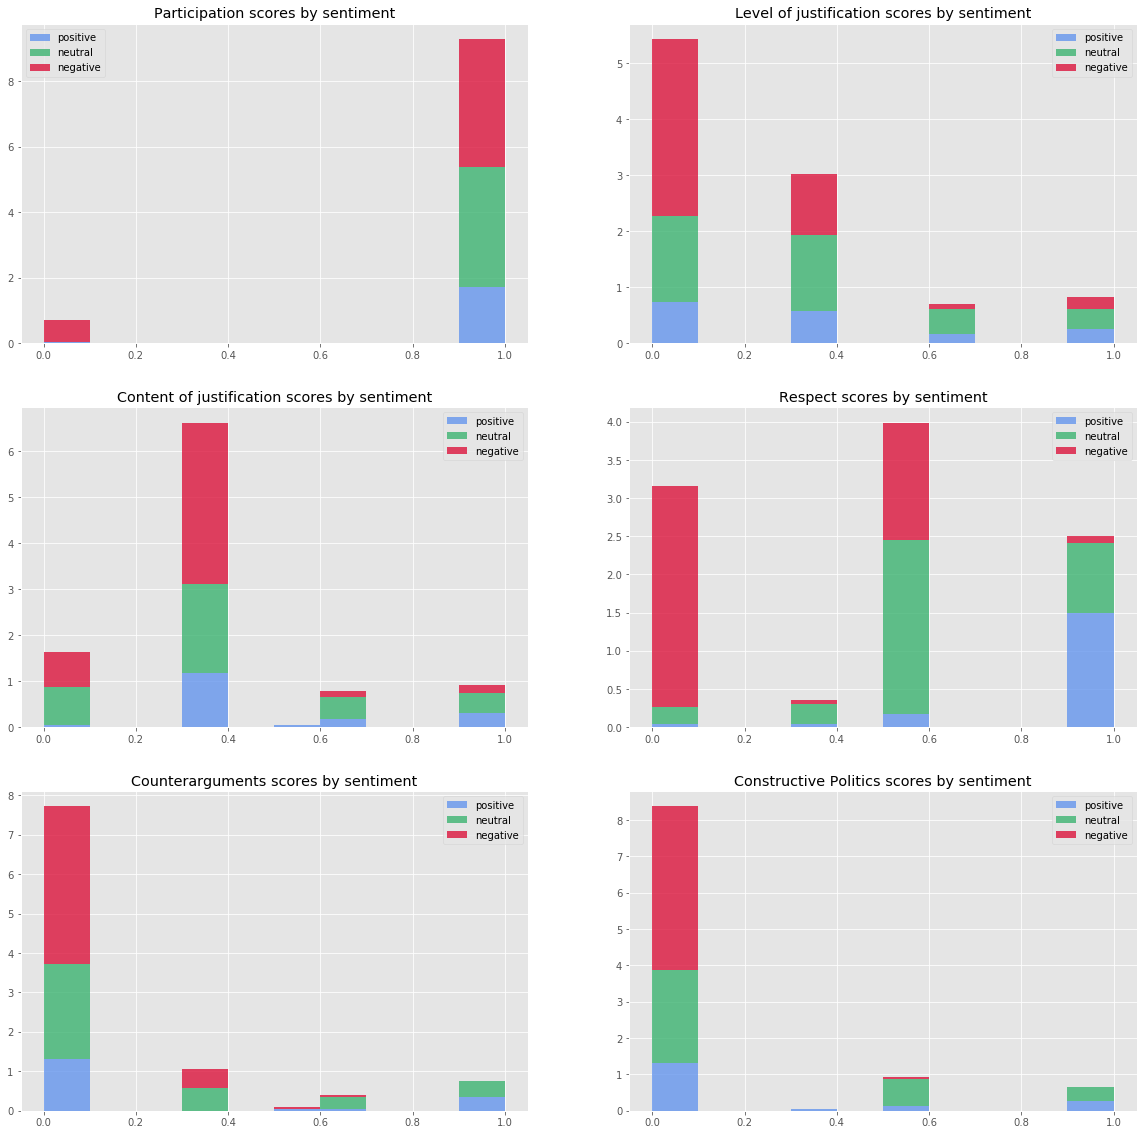

In [9]:
positive_p = data_df['participation'][(data_df['sentiment'] == 1)]
neutral_p = data_df['participation'][(data_df['sentiment'] == 0.5)]
negative_p = data_df['participation'][(data_df['sentiment'] == 0)]

positive_lj = data_df['level_of_justification'][(data_df['sentiment'] == 1)]
neutral_lj = data_df['level_of_justification'][(data_df['sentiment'] == 0.5)]
negative_lj = data_df['level_of_justification'][(data_df['sentiment'] == 0)]

positive_cj = data_df['content_of_justification'][(data_df['sentiment'] == 1)]
neutral_cj = data_df['content_of_justification'][(data_df['sentiment'] == 0.5)]
negative_cj = data_df['content_of_justification'][(data_df['sentiment'] == 0)]

positive_r = data_df['respect'][(data_df['sentiment'] == 1)]
neutral_r = data_df['respect'][(data_df['sentiment'] == 0.5)]
negative_r = data_df['respect'][(data_df['sentiment'] == 0)]

positive_c = data_df['counterarguments'][(data_df['sentiment'] == 1)]
neutral_c = data_df['counterarguments'][(data_df['sentiment'] == 0.5)]
negative_c = data_df['counterarguments'][(data_df['sentiment'] == 0)]

positive_cp = data_df['constructive_politics'][(data_df['sentiment'] == 1)]
neutral_cp = data_df['constructive_politics'][(data_df['sentiment'] == 0.5)]
negative_cp = data_df['constructive_politics'][(data_df['sentiment'] == 0)]

colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.2)
ax1 = fig.add_subplot(321)
ax1.hist([positive_p,neutral_p,negative_p], label=['positive','neutral','negative'], alpha = 0.8, color=colors,stacked=True, normed = True)
ax1.legend()
ax1.title.set_text('Participation scores by sentiment')

ax2 = fig.add_subplot(322)
ax2.hist([positive_lj,neutral_lj,negative_lj], label=['positive','neutral','negative'],alpha = 0.8, color=colors, stacked=True, normed = True)
ax2.legend()
ax2.title.set_text('Level of justification scores by sentiment')

ax3 = fig.add_subplot(323)
ax3.hist([positive_cj,neutral_cj,negative_cj], label=['positive','neutral','negative'],alpha = 0.8, color=colors,stacked=True, normed = True)
ax3.legend()
ax3.title.set_text('Content of justification scores by sentiment')

ax4 = fig.add_subplot(324)
ax4.hist([positive_r,neutral_r,negative_r], label=['positive','neutral','negative'],alpha = 0.8, color=colors,stacked=True, normed = True)
ax4.legend()
ax4.title.set_text('Respect scores by sentiment')

ax5 = fig.add_subplot(325)
ax5.hist([positive_c,neutral_c,negative_c], label=['positive','neutral','negative'],alpha = 0.8, color=colors,stacked=True, normed = True)
ax5.legend()
ax5.title.set_text('Counterarguments scores by sentiment')

ax6 = fig.add_subplot(326)
ax6.hist([positive_cp,neutral_cp,negative_cp], label=['positive','neutral','negative'],alpha = 0.8, color=colors,stacked=True, normed = True)
ax6.legend()
ax6.title.set_text('Constructive Politics scores by sentiment')

plt.show()

# Comment category
At this time, comments come from two sources - either they are a Facebook comment or they come from a live Town Hall event and were transcribed. The following charts show the distribution of DQI scores per comment category.

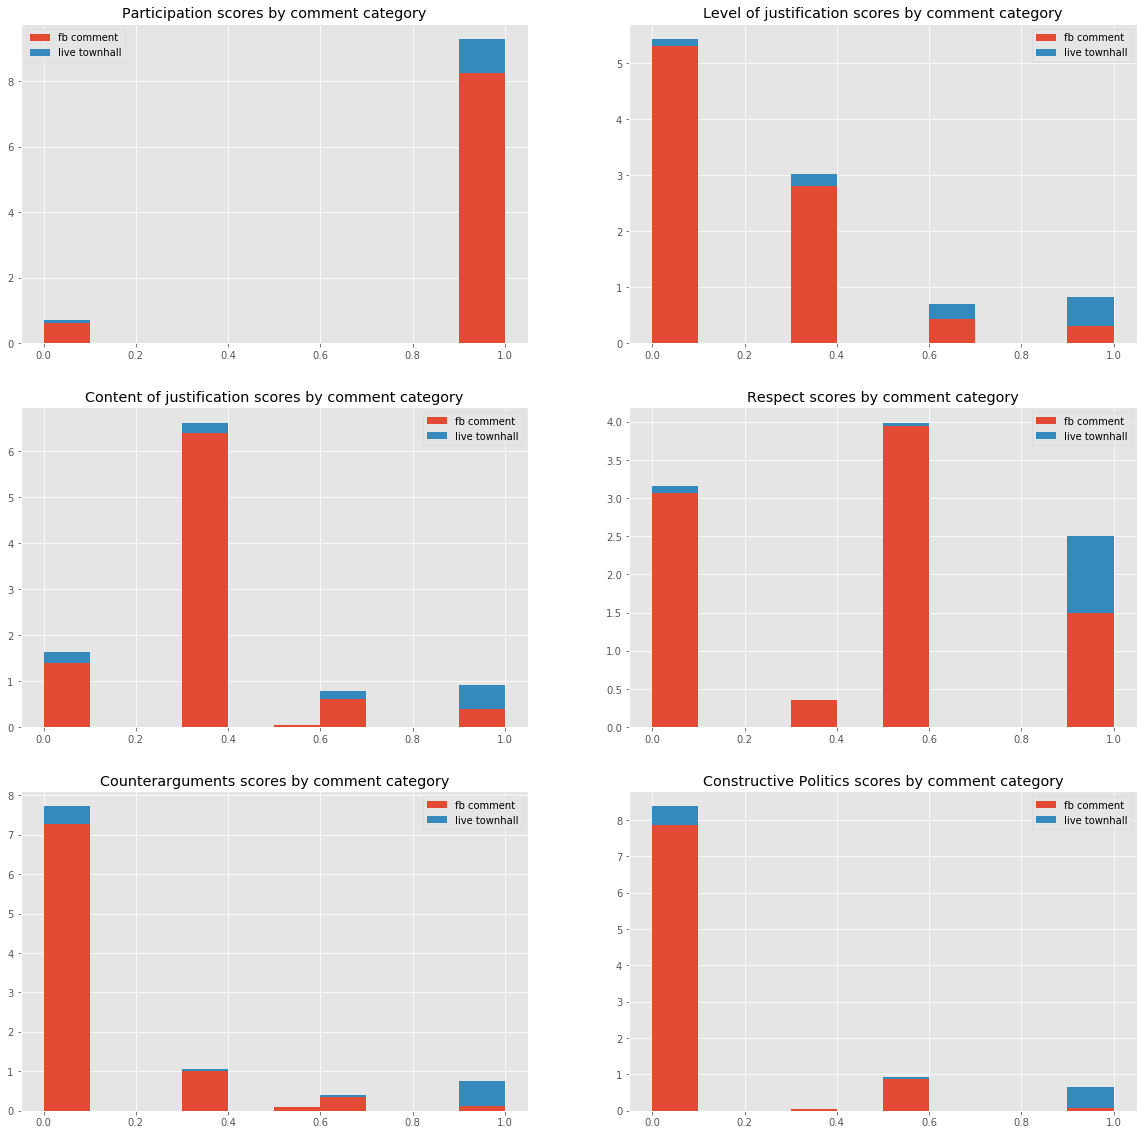

In [16]:
fb_comment_p = data_df['participation'][(data_df['fb_comment'] == 1)]
live_townhall_p = data_df['participation'][(data_df['live_th'] == 1)]

fb_comment_lj = data_df['level_of_justification'][(data_df['fb_comment'] == 1)]
live_townhall_lj = data_df['level_of_justification'][(data_df['live_th'] == 1)]

fb_comment_cj = data_df['content_of_justification'][(data_df['fb_comment'] == 1)]
live_townhall_cj = data_df['content_of_justification'][(data_df['live_th'] == 1)]

fb_comment_r = data_df['respect'][(data_df['fb_comment'] == 1)]
live_townhall_r = data_df['respect'][(data_df['live_th'] == 1)]

fb_comment_c = data_df['counterarguments'][(data_df['fb_comment'] == 1)]
live_townhall_c = data_df['counterarguments'][(data_df['live_th'] == 1)]

fb_comment_cp = data_df['constructive_politics'][(data_df['fb_comment'] == 1)]
live_townhall_cp = data_df['constructive_politics'][(data_df['live_th'] == 1)]

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.2)
ax1 = fig.add_subplot(321)
ax1.hist([fb_comment_p,live_townhall_p], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax1.legend()
ax1.title.set_text('Participation scores by comment category')

ax2 = fig.add_subplot(322)
ax2.hist([fb_comment_lj,live_townhall_lj], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax2.legend()
ax2.title.set_text('Level of justification scores by comment category')

ax3 = fig.add_subplot(323)
ax3.hist([fb_comment_cj,live_townhall_cj], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax3.legend()
ax3.title.set_text('Content of justification scores by comment category')

ax4 = fig.add_subplot(324)
ax4.hist([fb_comment_r,live_townhall_r], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax4.legend()
ax4.title.set_text('Respect scores by comment category')

ax5 = fig.add_subplot(325)
ax5.hist([fb_comment_c,live_townhall_c], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax5.legend()
ax5.title.set_text('Counterarguments scores by comment category')

ax6 = fig.add_subplot(326)
ax6.hist([fb_comment_cp,live_townhall_cp], label=['fb comment', 'live townhall'],stacked=True, normed = True)
ax6.legend()
ax6.title.set_text('Constructive Politics scores by comment category')

plt.show()

# Character counts
The following graphs explore a possible correlation between the comment character count and the indicator scores.

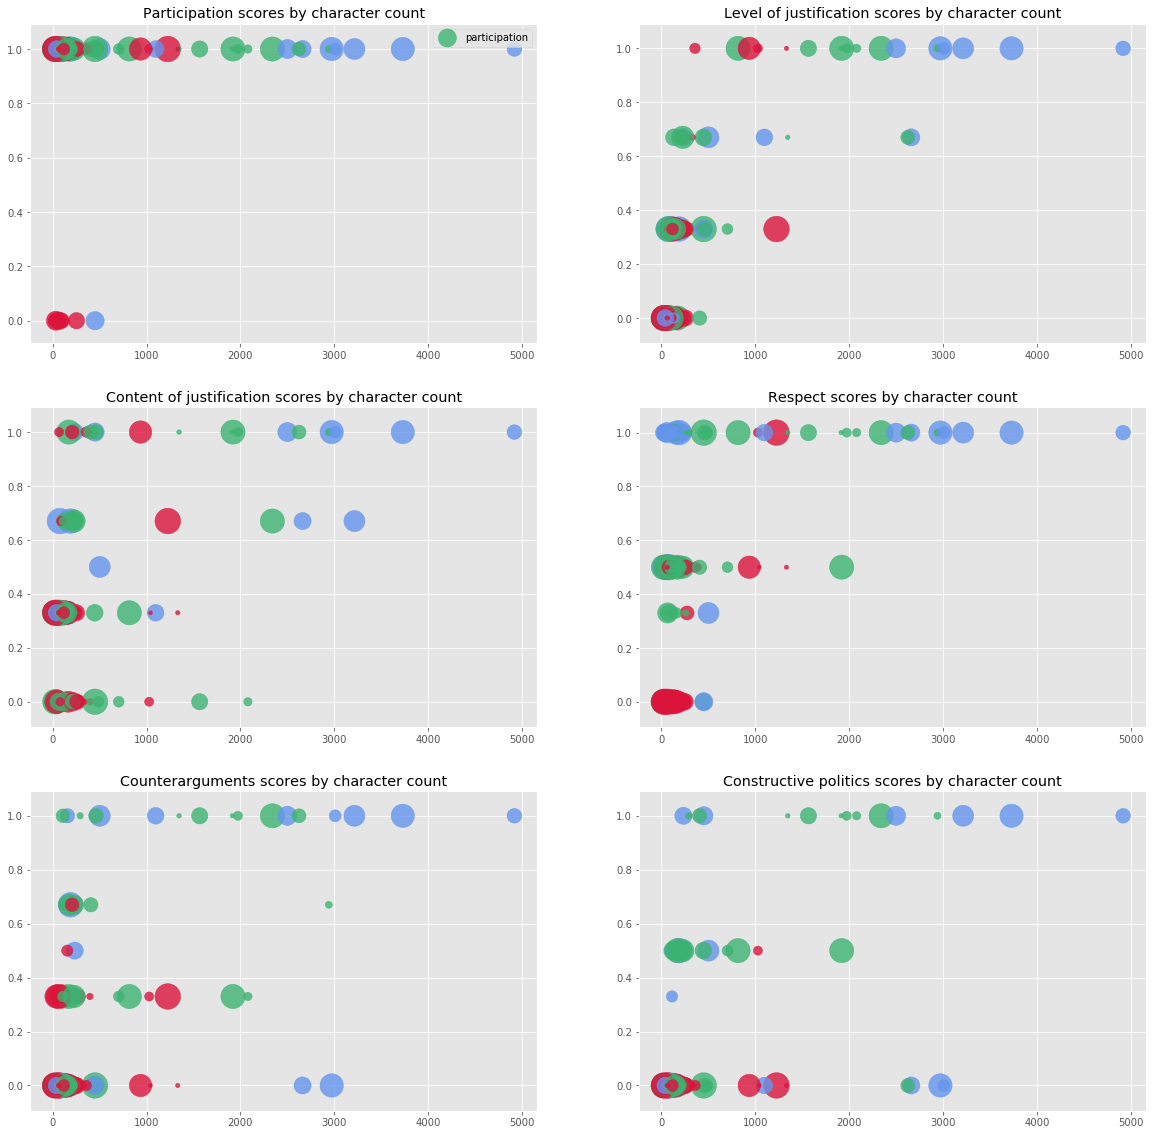

In [17]:
#Add character counts for each comment.
data_df['char_count'] = data_df['comment'].apply(lambda x: len(x))
#Build plots
x = data_df['char_count']
y_p = data_df['participation']
y_lj = data_df['level_of_justification']
y_cj = data_df['content_of_justification']
y_r = data_df['respect']
y_c = data_df['counterarguments']
y_cp = data_df['constructive_politics']

area = np.pi * (15*np.random.rand(50))**2

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.2)

colors = {0:'crimson', 0.5: 'mediumseagreen', 1: 'cornflowerblue'}

ax1 = fig.add_subplot(321)
ax1.scatter(x, y_p, s=area, alpha=0.8, c=data_df['sentiment'].apply(lambda x: colors[x]))
ax1.legend()
ax1.title.set_text('Participation scores by character count')

ax2 = fig.add_subplot(322)
ax2.scatter(x, y_lj, s=area, alpha=0.8, c=data_df['sentiment'].apply(lambda x: colors[x]))
ax2.title.set_text('Level of justification scores by character count')

ax3 = fig.add_subplot(323)
ax3.scatter(x, y_cj, s=area, alpha=0.8, c=data_df['sentiment'].apply(lambda x: colors[x]))
ax3.title.set_text('Content of justification scores by character count')

ax4 = fig.add_subplot(324)
ax4.scatter(x, y_r, s=area, alpha=0.8, c=data_df['sentiment'].apply(lambda x: colors[x]))
ax4.title.set_text('Respect scores by character count')

ax5 = fig.add_subplot(325)
ax5.scatter(x, y_c, s=area, alpha=0.8, c=data_df['sentiment'].apply(lambda x: colors[x]))
ax5.title.set_text('Counterarguments scores by character count')

ax6 = fig.add_subplot(326)
ax6.scatter(x, y_cp, s=area, alpha=0.8,c=data_df['sentiment'].apply(lambda x: colors[x]))
ax6.title.set_text('Constructive politics scores by character count')

plt.show()



# Regression analysis for character count
In the analysis above, respect was one of the indicators that seemed to have a higher correlation between character count and score. That is, it seemed that longer comments were more likely to have higher score. The below builds a regression model to which to fit the data.

In [18]:
# Build a regression model for respect vs character count

train_df, test_df = train_test_split(data_df, train_size = 0.6, random_state = 44)
train_sf = SFrame(data=train_df)
test_sf = SFrame(data=test_df)
    
level_of_justification_model = graphlab.linear_regression.create(train_sf, target='respect', 
                                                                features = ['char_count'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 128

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.004886     | 0.587738           | 0.505558             | 0.348686      | 0.371222        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [19]:
print level_of_justification_model.evaluate(test_sf)

{'max_error': 0.5886199815331368, 'rmse': 0.33324113478076234}


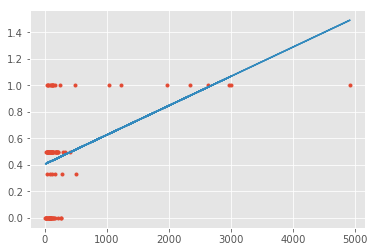

In [20]:
#Show predictions 
plt.plot(test_sf['char_count'], test_sf['respect'], '.', test_sf['char_count'], \
         level_of_justification_model.predict(test_sf), '-')